VOLATILITY MODELING

Importing Libs

In [48]:
import yfinance as yf
from arch import arch_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load Data

In [49]:
ticker = '^GSPC' #S&P500 Data last 3 years
period = '3y'
interval = '1d'

# Importing Data using Y finance
data = yf.download(ticker, interval= interval, period = period)
data['returns'] = np.log(data['Close'] / data['Close'].shift(1))
data = data.dropna()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12460\3488584379.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, interval= interval, period = period)
[*********************100%***********************]  1 of 1 completed


ARCH(1) Model

In [50]:
arch_model_fit = arch_model(data['returns'] * 100, vol='ARCH', p=1).fit()
print(arch_model_fit.summary())

arch_vol = arch_model_fit.conditional_volatility


Iteration:      1,   Func. Count:      5,   Neg. LLF: 3958.13692200345
Iteration:      2,   Func. Count:     12,   Neg. LLF: 2546962.823623415
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1106.6121626772915
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1007.255437948771
Iteration:      5,   Func. Count:     28,   Neg. LLF: 1007.2489789543725
Iteration:      6,   Func. Count:     31,   Neg. LLF: 1007.24897895442
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1007.2489789543725
            Iterations: 6
            Function evaluations: 31
            Gradient evaluations: 6
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1007.25
Distribution:                  Normal   AIC:

GARCH(1,1) Model

In [51]:
garch_model_fit = arch_model(data['returns'] * 100, vol='GARCH', p=1, q=1).fit()
print(garch_model_fit.summary())

garch_vol = garch_model_fit.conditional_volatility

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3814.850902928743
Iteration:      2,   Func. Count:     16,   Neg. LLF: 59509931299.557526
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1196.4983438395584
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1073.6884119106483
Iteration:      5,   Func. Count:     40,   Neg. LLF: 958.1525749776632
Iteration:      6,   Func. Count:     45,   Neg. LLF: 958.1520305712395
Iteration:      7,   Func. Count:     50,   Neg. LLF: 958.1519590208136
Iteration:      8,   Func. Count:     55,   Neg. LLF: 958.1519562302257
Iteration:      9,   Func. Count:     60,   Neg. LLF: 958.151955659174
Optimization terminated successfully    (Exit mode 0)
            Current function value: 958.151955659174
            Iterations: 9
            Function evaluations: 60
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:               

Forecast Comparing

In [52]:
arch_forecast = arch_model_fit.forecast(horizon=5)
garch_forecast = garch_model_fit.forecast(horizon=5)

print("ARCH Forecast : ", arch_forecast.variance.iloc[-1])
print("GARCH Forecast : ", garch_forecast.variance.iloc[-1])

ARCH Forecast :  h.1    0.688026
h.2    0.869021
h.3    0.916636
h.4    0.929162
h.5    0.932457
Name: 2025-11-25 00:00:00, dtype: float64
GARCH Forecast :  h.1    0.924821
h.2    0.918408
h.3    0.912363
h.4    0.906665
h.5    0.901295
Name: 2025-11-25 00:00:00, dtype: float64


EWMA Volatility (λ = 0.94)

In [53]:
lambda_ = 0.94 #Industry Standard
ewma_var = []

returns = data['returns'].values

ewma_var.append(np.var(returns))

for i in range(1, len(returns)):
     ewma_next = lambda_* ewma_var[-1] + (1-lambda_) * returns[i-1] ** 2
     ewma_var.append(ewma_next)

data['EWMA_vol'] = np.sqrt(ewma_var)


Plot

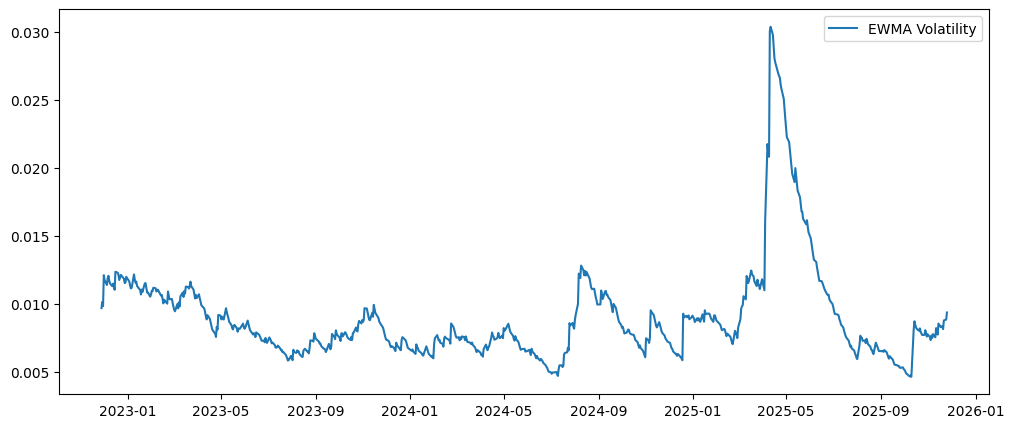

In [54]:
plt.figure(figsize=(12,5))
plt.plot(data['EWMA_vol'], label = "EWMA Volatility")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


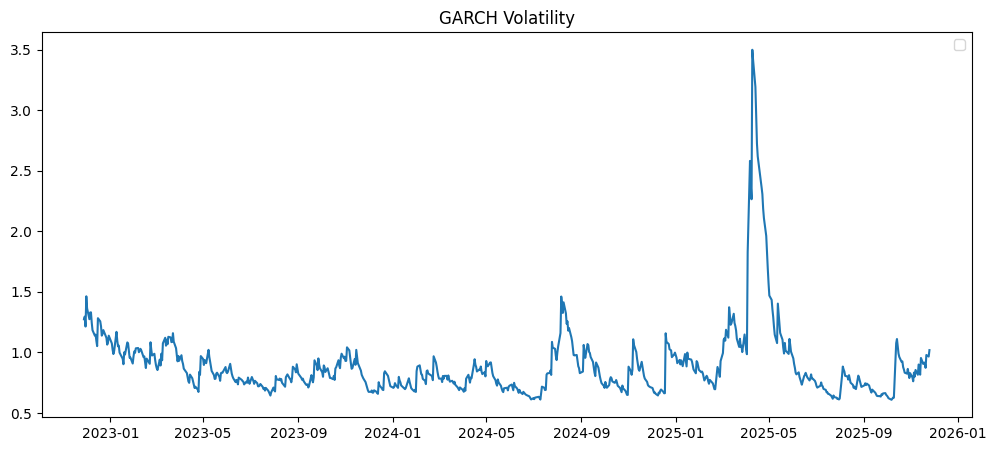

In [55]:
plt.figure(figsize=(12,5))
plt.plot(data.index, garch_vol)
plt.title("GARCH Volatility")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


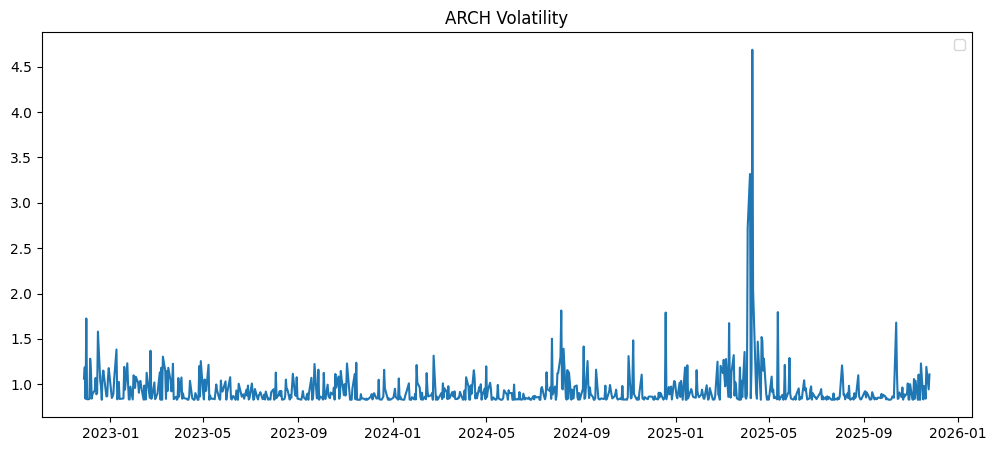

In [56]:
plt.figure(figsize=(12,5))
plt.plot(data.index, arch_vol)
plt.title("ARCH Volatility")
plt.legend()
plt.show()